# Study Group - Solution for Lending Club Case Study

### By: Edwin Mathew & Ishkhan Marzook

### Submission Date : 10th August 2022

## <ins>Business Understanding/Objectives</ins>

We got a request from an online loan marketplace specializing in Facilitating Personal Loans, business loans, and financing of medical procedures and financing of medical procedures. The company likes to do an Exploratory Credit Risk Analytics on the lending data available to them, the main objective of this task is to understand the 'risky' applicants that can cause Credit loss due to default. If the analysis can be used to identify the risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss due to defaults.

__The aim of this EDA(Exploratory Data Analysis) is to find the driving factors behind the loan default, variables that are strong indicators will be presented__

## <ins>Solution</ins>

__In order to achieve the goal of this case study, following steps will be followed__

1\. Loading the raw data from given loan data set file __loan.csv__

2\. Perfoming __Data Handling and Cleaning__ on loan data set

3\. Performing __Sanity Checks and Outlier Analysis__ on loan data set

4\. Performing __Univariate Analysis__ on loan data set

5\. Performing __Bivariate Analysis__ on loan data set

#### 1. Loading the raw data from given loan data set file loan.csv

In [1]:
# import the required libraries
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import plotly.express as px

In [2]:
# this is to see more columns during analysis  
pd.options.display.max_columns = None
# this is to see more rows during analysis 
pd.options.display.max_rows = None

In [3]:
# read csv file and store it in dataframe
loan_data = pd.read_csv(r'loan.csv', header=0)

In [4]:
# analyze the shape of the data
loan_data.shape

(39717, 111)

According to the above analysis we can conclude there are __39717 rows__ and __111 columns__ in the loan data set

In [5]:
# analyze the top 5 records 
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### 2. Perfoming Data Handling and Cleaning on loan data set

In [6]:
# analyzing the column info
loan_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

According to the above analysis, we can notice that there are a number of columns having discrepancies, we need to impute or remove those columns based on further analysis. According to further analysis we can find 2 major categories of columns with descripancies,<br>
&emsp;&emsp;&emsp;&emsp;__- Columns with no records (0 records)__<br>
&emsp;&emsp;&emsp;&emsp;__- Columns with missing records (records more than 0 and lesser than 39717)__

__Since columns with no records don't make any sense and won't contribute to the analysis we need to remove those columns to reduce the noise of the loan data set__

In [7]:
# removing columns with 0 records 
loan_data = loan_data[loan_data.columns[(loan_data.isnull().sum()) < len(loan_data)]]

In [8]:
# # analyzing the column info after removing columns with 0 records 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [9]:
# getting the list of columns having less than 39717 records
loan_data.columns[(loan_data.notnull().sum()) < len(loan_data)]

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

According to the above analysis following columns having lesser than 39717 records (which means there are missing records)<br><br>
&emsp;&emsp;&emsp;&emsp;__- emp_title__<br>
&emsp;&emsp;&emsp;&emsp;__- emp_length__<br>
&emsp;&emsp;&emsp;&emsp;__- desc__<br>
&emsp;&emsp;&emsp;&emsp;__- title__<br>
&emsp;&emsp;&emsp;&emsp;__- mths_since_last_delinq__<br>
&emsp;&emsp;&emsp;&emsp;__- mths_since_last_record__<br>
&emsp;&emsp;&emsp;&emsp;__- revol_util__<br>
&emsp;&emsp;&emsp;&emsp;__- last_pymnt_d__<br>
&emsp;&emsp;&emsp;&emsp;__- next_pymnt_d__<br>
&emsp;&emsp;&emsp;&emsp;__- last_credit_pull_d__<br>
&emsp;&emsp;&emsp;&emsp;__- collections_12_mths_ex_med__<br>
&emsp;&emsp;&emsp;&emsp;__- chargeoff_within_12_mths__<br>
&emsp;&emsp;&emsp;&emsp;__- pub_rec_bankruptcies__<br>
&emsp;&emsp;&emsp;&emsp;__- tax_liens__<br>
<br>

Now we need to analyze each of the above columns and need to conclude how we are going to handle the missing records, either impute or remove the respective row. To get a better understanding of missing records we need to find the percentage missing records

In [10]:
# analyzing the percentage of missing records 
loan_data[loan_data.columns[loan_data.isnull().any()]].isnull().sum() * 100 / loan_data.shape[0]

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

Approximately __6.19%__ of __emp_title__ records are missing, since __emp_title__ is a vital categorical variable it's not appropriate to impute, hence decided to remove the records which having missing values

In [11]:
# removing the missing emp_title records 
loan_data = loan_data[~loan_data.emp_title.isnull()]

Approximately __2.7%__ of __emp_length__ records are missing and it's considerably less, since __emp_length__ is a vital categorical variable it's not appropriate to impute, hence decided to remove the records which having missing values

In [12]:
# removing the missing emp_length records 
loan_data = loan_data[~loan_data.emp_length.isnull()]

Approximately __32.58%__ of __desc__ records are missing and it's not an appropriate column to become a categorical variable, hence decided to remove the __desc__ column

In [13]:
# removing the desc column  
loan_data = loan_data.drop('desc', axis=1)

Approximately __0.02%__ of __title__ records are missing, since __title__ column is a good categorical variable candidate,   decided to remove the records which having missing values

In [14]:
# removing the missing title records 
loan_data = loan_data[~loan_data.title.isnull()]

Approximately __64.66%__ of __mths_since_last_delinq__ records are missing and as per data dictionary we can consider missing records as 0 months, hence impute 0 for all missing __mths_since_last_delinq__ records

In [15]:
# impute 0 for all missing mths_since_last_delinq records
loan_data.mths_since_last_delinq = loan_data.mths_since_last_delinq.fillna(0)

Approximately __92.98%__ of __mths_since_last_record__ records are missing and the idle solution is to remove the entire __mths_since_last_record__ column, but before removing the column based on the available records, we need to remove the records older than 30 days to keep the Loan Dataset updated.

In [16]:
# removing the records older than 30 days 
loan_data.mths_since_last_record = loan_data.mths_since_last_record.fillna(0)
loan_data = loan_data[loan_data.mths_since_last_record<30]
# removing the mths_since_last_record column 
loan_data = loan_data.drop('mths_since_last_record', axis=1)

Approximately __0.12%__ of __revol_util__ records are missing and decided to remove the records which having missing values

In [17]:
# removing the missing revol_util records 
loan_data = loan_data[~loan_data.revol_util.isnull()]

Approximately __0.17%__ of __last_pymnt_d__ records are missing and decided to remove the records which having missing values

In [18]:
# removing the missing last_pymnt_d records 
loan_data = loan_data[~loan_data.last_pymnt_d.isnull()]

Approximately __97.12%__ of __next_pymnt_d__ records are missing and decided to remove the __next_pymnt_d__ column

In [19]:
# removing the next_pymnt_d column 
loan_data = loan_data.drop('next_pymnt_d', axis=1)

__All missing records related to *last_credit_pull_d* values, got removed with deletion of above rows and columns__

Approximately __0.14%__ of __collections_12_mths_ex_med__ are missing and decided to remove the records which having missing values

In [20]:
# removing the missing collections_12_mths_ex_med records 
loan_data = loan_data[~loan_data.collections_12_mths_ex_med.isnull()]

__All missing records related to *chargeoff_within_12_mths* & *tax_liens* values, got removed with deletion of *collections_12_mths_ex_med* records__

Approximately __1.75%__ of __pub_rec_bankruptcies__ records are missing and decided to remove the records which having missing values

In [21]:
loan_data = loan_data[~loan_data.pub_rec_bankruptcies.isnull()]

After removing all the missing values in loan data set, need to ensure there are no more missing records, hence we need to check for any missing values again

In [22]:
# checking for missing values
loan_data[loan_data.columns[loan_data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [23]:
# getting the current shape of the loan data set
loan_data.shape

(34595, 54)

The above analysis ensured there were no more missing values and after removing the all missing values there were __34595__ records and __54__ columns. Now we need to proceed further and need to check if are there any columns with invalid data types

In [24]:
# getting data type details of current loan data set 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34595 entries, 1 to 39002
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          34595 non-null  int64  
 1   member_id                   34595 non-null  int64  
 2   loan_amnt                   34595 non-null  int64  
 3   funded_amnt                 34595 non-null  int64  
 4   funded_amnt_inv             34595 non-null  float64
 5   term                        34595 non-null  object 
 6   int_rate                    34595 non-null  object 
 7   installment                 34595 non-null  float64
 8   grade                       34595 non-null  object 
 9   sub_grade                   34595 non-null  object 
 10  emp_title                   34595 non-null  object 
 11  emp_length                  34595 non-null  object 
 12  home_ownership              34595 non-null  object 
 13  annual_inc                  345

During the analysis for data type mismatch following discrepancies identified,<br><br>
&emsp;&emsp;&emsp;&emsp;- __loan_amnt__ should be type __float64__<br>
&emsp;&emsp;&emsp;&emsp;- __funded_amnt__ should be type __float64__<br>
&emsp;&emsp;&emsp;&emsp;- __term__ should be type __int32__<br>
&emsp;&emsp;&emsp;&emsp;- __int_rate__ should be type __float64__<br>
&emsp;&emsp;&emsp;&emsp;- __emp_length__ should be type __int32__<br>
&emsp;&emsp;&emsp;&emsp;- __issue_d__ needed to segregate into __issue_d_month__ & __issue_d_year__<br>
&emsp;&emsp;&emsp;&emsp;- __earliest_cr_line__ needed to segregate into __earliest_cr_line_month__ & __earliest_cr_line_year__<br>
&emsp;&emsp;&emsp;&emsp;- __revol_util__ should be type __float64__<br>
&emsp;&emsp;&emsp;&emsp;- __last_pymnt_d__ needed to segregate into __last_pymnt_d_month__ & __last_pymnt_d_year__<br>
&emsp;&emsp;&emsp;&emsp;- __last_credit_pull_d__ needed to segregate into __last_credit_pull_d_month__ & __last_credit_pull_d_year__<br>
&emsp;&emsp;&emsp;&emsp;- __pub_rec_bankruptcies__ should be type __int32__<br>
&emsp;&emsp;&emsp;&emsp;- __tax_liens__ should be type __int32__<br><br>
Following discrepacies should be addressed before proceeding further

In [25]:
# cast loan_amnt into float64
loan_data.loan_amnt = loan_data.loan_amnt.astype('float64')

In [26]:
# cast funded_amnt into float64
loan_data.funded_amnt = loan_data.funded_amnt.astype('float64')

In [27]:
# cast term into int32
loan_data.term = loan_data.term.str[1:3].astype('int32')

In [28]:
# cast int_rate into float64
loan_data.int_rate = loan_data.int_rate.str[:-1].astype('float64')

In [29]:
# cast emp_length into int32, as per the provided data dictionary possible values are between 0 and 10 
# where 0 means less than one year and 10 means ten or more years. 
loan_data.emp_length = loan_data.emp_length.apply(lambda x: 0 if x=='< 1 year' else int(x[:2]))

In [30]:
# segregate last_pymnt_d into issue_d_month & issue_d_year
loan_data['issue_d_month'] = loan_data.issue_d.str.split('-', 1).str[0]
loan_data['issue_d_year'] = loan_data.issue_d.str.split('-', 1).str[1].apply(lambda x: '20'+x)

In [31]:
# segregate earliest_cr_line into earliest_cr_line_month & earliest_cr_line_year
loan_data['earliest_cr_line_month'] = loan_data.earliest_cr_line.str.split('-', 1).str[0]
loan_data['earliest_cr_line_year'] = loan_data.earliest_cr_line.str.split('-', 1).str[1].apply(lambda x: '20'+x if int(x)<=10 else '19'+x) 

In [32]:
# cast revol_util into float64
loan_data.revol_util = loan_data.revol_util.str[:-1].astype('float64')

In [33]:
# segregate last_pymnt_d into last_pymnt_d_month & last_pymnt_d_year
loan_data['last_pymnt_d_month'] = loan_data.last_pymnt_d.str.split('-', 1).str[0]
loan_data['last_pymnt_d_year'] = loan_data.last_pymnt_d.str.split('-', 1).str[1].apply(lambda x: '20'+x)

In [34]:
# segregate last_credit_pull_d into last_credit_pull_d_month & last_credit_pull_d_year
loan_data['last_credit_pull_d_month'] = loan_data.last_credit_pull_d.str.split('-', 1).str[0]
loan_data['last_credit_pull_d_year'] = loan_data.last_credit_pull_d.str.split('-', 1).str[1].apply(lambda x: '20'+x)

In [35]:
# cast pub_rec_bankruptcies into int32
loan_data.pub_rec_bankruptcies = loan_data.pub_rec_bankruptcies.astype('int32')

In [36]:
# cast tax_liens into int32
loan_data.tax_liens = loan_data.tax_liens.astype('int32')

In [37]:
# getting the current shape of the loan data set
loan_data.shape

(34595, 62)

With the above data type discrepancy correction, we have done most of the required Data Handling and Cleaning on Loan Data Set, after the correction loan data set contains __34595 records__ and __62 columns__

In [38]:
# getting data type details of current loan data set 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34595 entries, 1 to 39002
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          34595 non-null  int64  
 1   member_id                   34595 non-null  int64  
 2   loan_amnt                   34595 non-null  float64
 3   funded_amnt                 34595 non-null  float64
 4   funded_amnt_inv             34595 non-null  float64
 5   term                        34595 non-null  int32  
 6   int_rate                    34595 non-null  float64
 7   installment                 34595 non-null  float64
 8   grade                       34595 non-null  object 
 9   sub_grade                   34595 non-null  object 
 10  emp_title                   34595 non-null  object 
 11  emp_length                  34595 non-null  int64  
 12  home_ownership              34595 non-null  object 
 13  annual_inc                  345

#### 3. Performing Sanity Checks and Outlier Analysis on Loan Data Set

As a part of __EDA (Exploratory Data Analysis)__ process, we need to perform a sanity check on vital variables, We are going to perform the following sanity check on the loan data set. <br><br>
&emsp;&emsp;&emsp;&emsp;-  Required to validate that __loan_status__ values contain only __'Fully paid', 'Current'__ and __'Charged-off'__<br>
&emsp;&emsp;&emsp;&emsp;-  Required to validate that there are no __funded_amnt__ more than __loan_amnt__<br>
&emsp;&emsp;&emsp;&emsp;-  Required to validate that there are no __funded_amnt_inv__ more than __loan_amnt__<br>
&emsp;&emsp;&emsp;&emsp;-  Required to validate that __int_rate__ contains only values between __0%__ to __100%__ and whether __int_rate__ values are acceptable<br>
&emsp;&emsp;&emsp;&emsp;-  Required to analyze the __annual_inc__ for detect outliers and remove them<br>

In [39]:
# printing the unique loan_status values
print(loan_data.loan_status.unique())

['Charged Off' 'Fully Paid' 'Current']


According to the above analysis, we can ensure that __loan_status__ column only contains values __'Fully paid'__, __'Current'__ and __'Charged-off'__

In [40]:
# checking for the records funded_amnt is more than loan_amnt 
loan_data[loan_data.loan_amnt<loan_data.funded_amnt].shape[0]

0

According to the above analysis, we can ensure that there are no records with __funded_amnt__ more than __loan_amnt__

In [41]:
# checking for the records funded_amnt_inv is more than loan_amnt 
loan_data[loan_data.loan_amnt<loan_data.funded_amnt_inv].shape[0]

0

According to the above analysis, we can ensure that there are no records with __funded_amnt_inv__ more than __loan_amnt__

In [42]:
# analyzing the int_rate values
loan_data.int_rate.describe()

count    34595.000000
mean        11.991620
std          3.742412
min          5.420000
25%          8.940000
50%         11.830000
75%         14.540000
max         24.400000
Name: int_rate, dtype: float64

According to the above analysis, the minimum  __int_rate__ is __5.42%__ and the maximum __int_rate__ is __24.40%__ which is an acceptable spread for __int_rate__, hence we can ensure __int_rate__ values are accurate

<AxesSubplot:ylabel='annual_inc'>

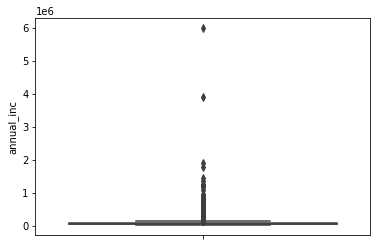

In [43]:
# analyzing the annual_inc values
sns.boxplot(y=loan_data.annual_inc)

According to the above __annual_inc__ Box Plot, we can see there are outliers, to perform further analysis, the outliers of the annual income need to be removed since this can throw off the data, hence we need to filter the loan dataset by the interquartile range of the borrower's annual income.

In [44]:
# calculate annual_inc interquartile range
q25, q75 = percentile(loan_data['annual_inc'], 25), percentile(loan_data['annual_inc'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=42000.000, 75th=83400.000, IQR=41400.000


In [45]:
#find out the outlier cutoff of annual_inc
cutoff = iqr * 1.5
lowerc, upperc = q25 - cutoff, q75 + cutoff
print (cutoff,lowerc,upperc)

62100.0 -20100.0 145500.0


In [46]:
# identify and remove outliers
loan_data = loan_data.loc[(loan_data['annual_inc'] >= lowerc) & (loan_data['annual_inc'] <= upperc)]

In [47]:
# getting the current shape of the loan data set
loan_data.shape

(33009, 62)

__As per the above vital sanity checks, we can ensure that the loan data set is ready for further analysis.__

#### 4. Performing *Univariate Analysis* on loan data set

##### Analysing Loan Status 

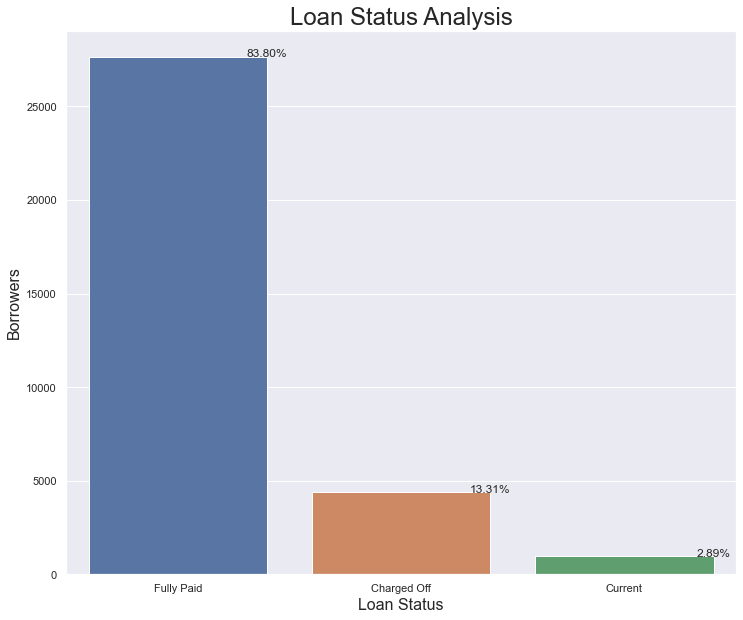

In [48]:
# plotting loan status including percentage
counts = loan_data['loan_status'].value_counts().rename_axis('loan_status').reset_index(name='count')
sns.set(rc={'figure.figsize':(12,10)})

total = float(len(loan_data))
ax = sns.barplot(x='loan_status', y='count', data=counts)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.title('Loan Status Analysis', fontsize=24)
plt.xlabel('Loan Status', fontsize=16);
plt.ylabel('Borrowers', fontsize=16);
plt.show()

According to the above analysis of loan status records, we can conclude the following facts <br>
&emsp;&emsp;&emsp;&emsp;-  __83.80%__ of the borrowers __Fully Paid__ the loan<br>
&emsp;&emsp;&emsp;&emsp;-  __13.31%__ of the borrowers __Charged Off__ (which means defaulted)<br>
&emsp;&emsp;&emsp;&emsp;-  __2.89%__ of the borrowers are __Current__ (which means in the process of paying the installments)<br>


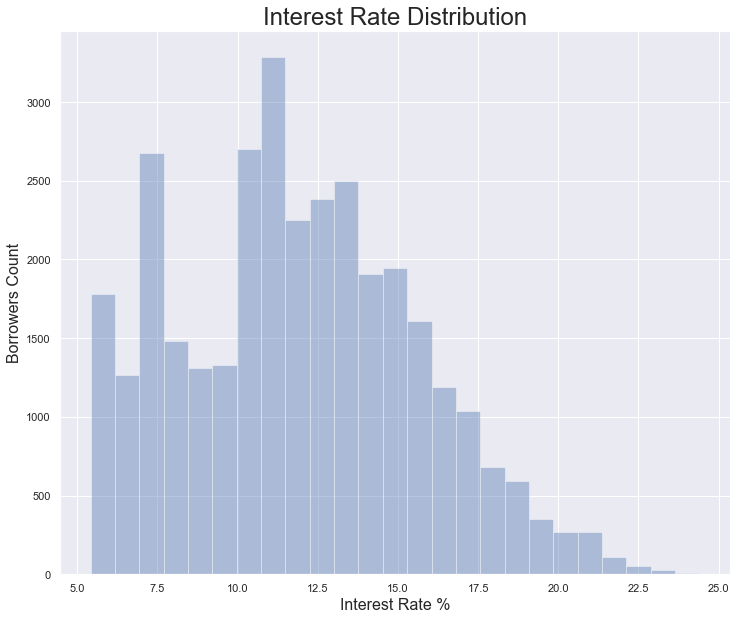

In [91]:
sns.distplot(loan_data.int_rate,bins=25, kde=False)
sns.set(rc={'figure.figsize':(12,10)})
plt.title('Interest Rate Distribution', fontsize=24)
plt.xlabel('Interest Rate %', fontsize=16);
plt.ylabel('Borrowers Count', fontsize=16);
plt.show()

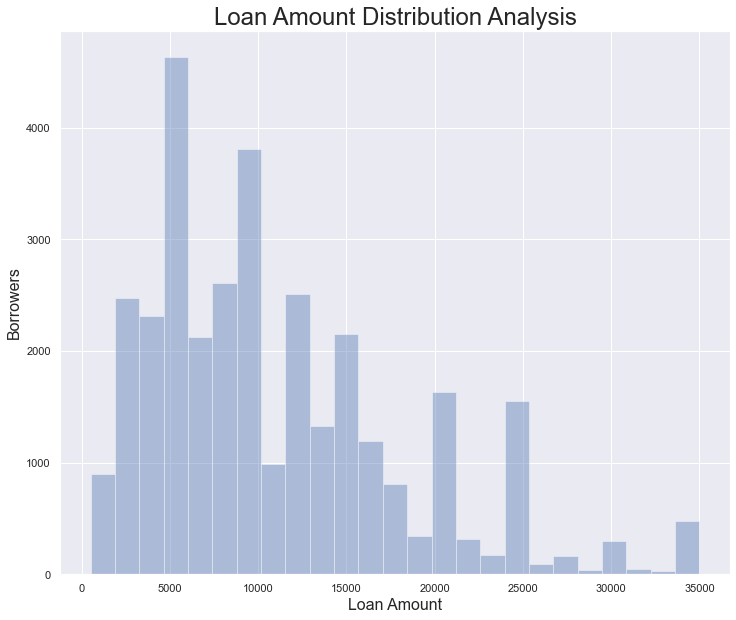

In [92]:
sns.distplot(loan_data.loan_amnt,bins=25, kde=False)
sns.set(rc={'figure.figsize':(12,10)})
plt.title('Loan Amount Distribution Analysis', fontsize=24)
plt.xlabel('Loan Amount', fontsize=16);
plt.ylabel('Borrowers', fontsize=16);
plt.show()

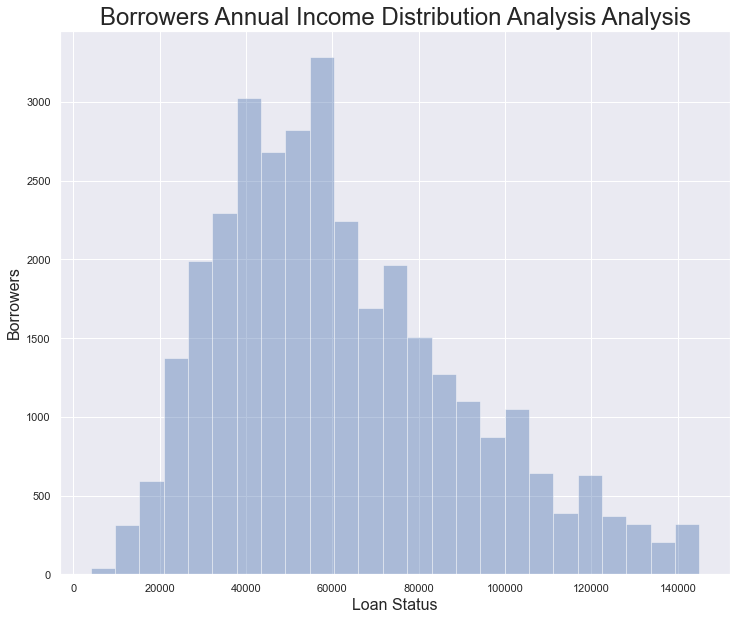

In [93]:
sns.distplot(loan_data.annual_inc,bins=25, kde=False)
sns.set(rc={'figure.figsize':(12,10)})
plt.title('Borrowers Annual Income Distribution Analysis Analysis', fontsize=24)
plt.xlabel('Loan Status', fontsize=16);
plt.ylabel('Borrowers', fontsize=16);
plt.show()

##### Analysing Loan Term 

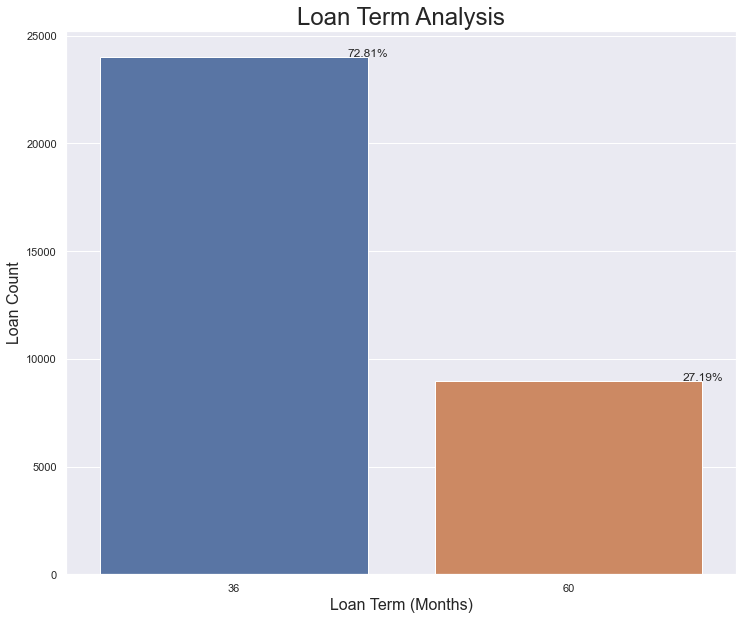

In [70]:
# plotting loan status including percentage
counts = loan_data['term'].value_counts().rename_axis('term').reset_index(name='count')
sns.set(rc={'figure.figsize':(12,10)})

total = float(len(loan_data))
ax = sns.barplot(x='term', y='count', data=counts)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.title('Loan Term Analysis', fontsize=24)
plt.xlabel('Loan Term (Months)', fontsize=16);
plt.ylabel('Loan Count', fontsize=16);
plt.show()

According to the above analysis of loan term records, we can conclude the following facts <br>
&emsp;&emsp;&emsp;&emsp;-  __72.81%__ of the loans are __36 Months__ termed<br>
&emsp;&emsp;&emsp;&emsp;-  __27.19%__ of the loans are __60 Months__ termed<br>


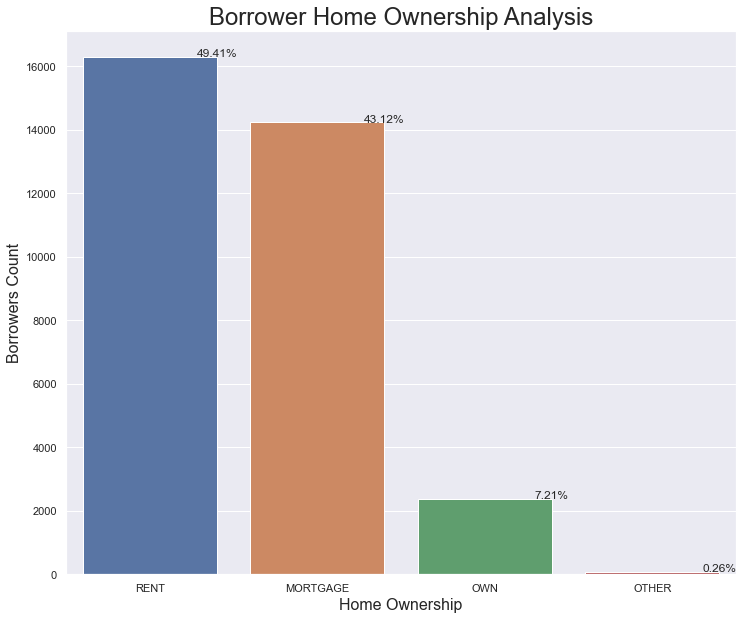

In [71]:
# plotting loan status including percentage
counts = loan_data['home_ownership'].value_counts().rename_axis('home_ownership').reset_index(name='count')
sns.set(rc={'figure.figsize':(12,10)})

total = float(len(loan_data))
ax = sns.barplot(x='home_ownership', y='count', data=counts)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.title('Borrower Home Ownership Analysis', fontsize=24)
plt.xlabel('Home Ownership', fontsize=16);
plt.ylabel('Borrowers Count', fontsize=16);
plt.show()

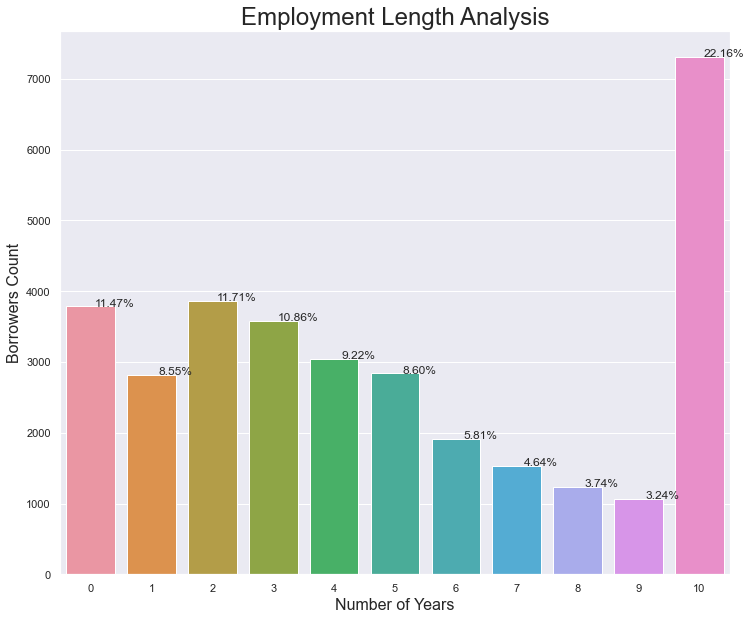

In [94]:
# plotting loan status including percentage
counts = loan_data['emp_length'].value_counts().rename_axis('emp_length').reset_index(name='count')
sns.set(rc={'figure.figsize':(12,10)})

total = float(len(loan_data))
ax = sns.barplot(x='emp_length', y='count', data=counts)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.title('Employment Length Analysis', fontsize=24)
plt.xlabel('Number of Years', fontsize=16);
plt.ylabel('Borrowers Count', fontsize=16);
plt.show()

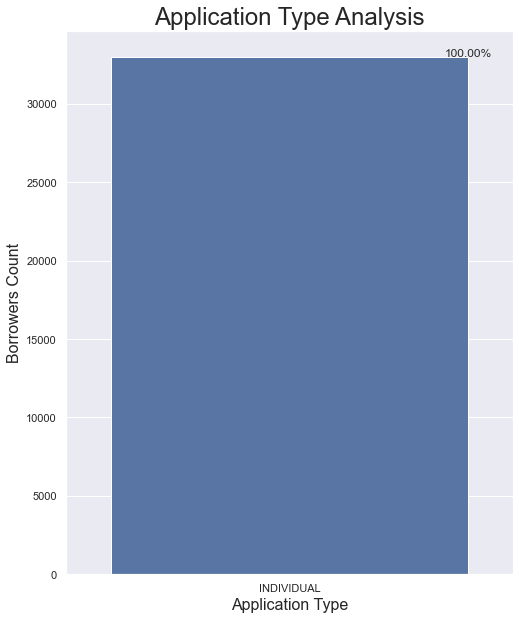

In [95]:
# plotting loan status including percentage
counts = loan_data['application_type'].value_counts().rename_axis('application_type').reset_index(name='count')
sns.set(rc={'figure.figsize':(8,10)})

total = float(len(loan_data))
ax = sns.barplot(x='application_type', y='count', data=counts)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.title('Application Type Analysis', fontsize=24)
plt.xlabel('Application Type', fontsize=16);
plt.ylabel('Borrowers Count', fontsize=16);
plt.show()

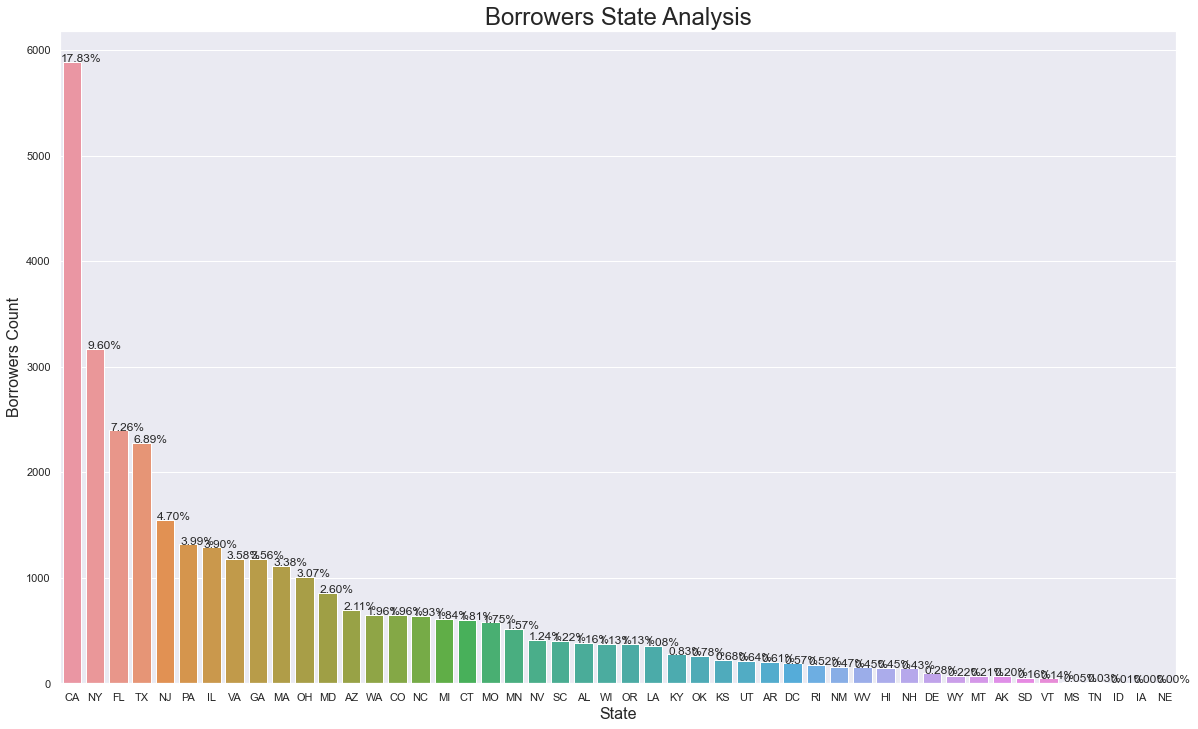

In [96]:
# plotting loan status including percentage
counts = loan_data['addr_state'].value_counts().rename_axis('addr_state').reset_index(name='count')
sns.set(rc={'figure.figsize':(20,12)})

total = float(len(loan_data))
ax = sns.barplot(x='addr_state', y='count', data=counts)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.title('Borrowers State Analysis', fontsize=24)
plt.xlabel('State', fontsize=16);
plt.ylabel('Borrowers Count', fontsize=16);
plt.show()